In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Load

In [ ]:
import numpy as np
import pandas as pd
from google.colab import output
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/데이터/텀프데이터셋최종.csv", encoding='utf-8')

In [ ]:
df.head()

,일자,시/군/구,연도,시설수,인구수,교통량,승하차,승차건수,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
0,2019-01-01,강남구,2019,17,15439,74968.0,306117,37,201,1406,1046,32.8,2416,10404,0
1,2019-01-01,강동구,2019,13,17669,86442.0,124983,31,201,1406,1046,32.8,2416,10404,0
2,2019-01-01,강북구,2019,8,17517,46124.0,80664,38,201,1406,1046,32.8,2416,10404,0
3,2019-01-01,강서구,2019,17,28854,70420.0,120194,45,201,1406,1046,32.8,2416,10404,0
4,2019-01-01,관악구,2019,9,20299,38121.0,175446,12,201,1406,1046,32.8,2416,10404,0


In [ ]:
df[(df["시/군/구"]=="강남구")&(df["일자"]=="2021-01-01")]

,일자,시/군/구,연도,시설수,인구수,교통량,승하차,승차건수,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
18275,2021-01-01,강남구,2021,17,15182,51520.0,131723,10,276,805,729,17.7,2267,8912,0


In [ ]:
df1 = df.sort_values(by='일자' ,ascending=True)

In [ ]:
df1.head()

,일자,시/군/구,연도,시설수,인구수,교통량,승하차,승차건수,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
0,2019-01-01,강남구,2019,17,15439,74968.0,306117,37,201,1406,1046,32.8,2416,10404,0
24,2019-01-01,중랑구,2019,3,20361,54931.0,79145,44,201,1406,1046,32.8,2416,10404,0
23,2019-01-01,중구,2019,8,5712,23632.0,409406,8,201,1406,1046,32.8,2416,10404,0
22,2019-01-01,종로구,2019,4,6068,24259.0,330176,21,201,1406,1046,32.8,2416,10404,0
21,2019-01-01,은평구,2019,10,21617,31820.0,164332,23,201,1406,1046,32.8,2416,10404,0


In [ ]:
df1.reset_index(drop=True, inplace=True)

In [ ]:
df1.head()

,일자,시/군/구,연도,시설수,인구수,교통량,승하차,승차건수,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
0,2019-01-01,강남구,2019,17,15439,74968.0,306117,37,201,1406,1046,32.8,2416,10404,0
1,2019-01-01,중랑구,2019,3,20361,54931.0,79145,44,201,1406,1046,32.8,2416,10404,0
2,2019-01-01,중구,2019,8,5712,23632.0,409406,8,201,1406,1046,32.8,2416,10404,0
3,2019-01-01,종로구,2019,4,6068,24259.0,330176,21,201,1406,1046,32.8,2416,10404,0
4,2019-01-01,은평구,2019,10,21617,31820.0,164332,23,201,1406,1046,32.8,2416,10404,0


In [ ]:
df_test=pd.read_csv('/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/데이터/텀프데이터셋2022년1월_6월_prophet_결측치채우기완.csv',encoding='utf-8-sig')

In [ ]:
#df_test['인구수'] = df_test.인구수.str.replace(',', '').astype('int')

In [ ]:
#df_test.index = df_test['일자']

In [ ]:
df_test.head()

,일자,시/군/구,시설수,인구수,교통량,승하차,차량운행
0,2022-01-01,강남구,17.0,15182.0,123400.0,227057.0,297.0
1,2022-01-01,강동구,13.0,18614.0,82512.0,114019.0,297.0
2,2022-01-01,강북구,8.0,17395.0,87392.7,65767.0,297.0
3,2022-01-01,강서구,17.0,28546.0,136910.0,105170.0,297.0
4,2022-01-01,관악구,9.0,20211.0,63307.0,140191.0,297.0


In [ ]:
df_train =df1.copy()

In [ ]:
df_train.head()

,일자,시/군/구,연도,시설수,인구수,교통량,승하차,승차건수,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
0,2019-01-01,강남구,2019,17,15439,74968.0,306117,37,201,1406,1046,32.8,2416,10404,0
1,2019-01-01,중랑구,2019,3,20361,54931.0,79145,44,201,1406,1046,32.8,2416,10404,0
2,2019-01-01,중구,2019,8,5712,23632.0,409406,8,201,1406,1046,32.8,2416,10404,0
3,2019-01-01,종로구,2019,4,6068,24259.0,330176,21,201,1406,1046,32.8,2416,10404,0
4,2019-01-01,은평구,2019,10,21617,31820.0,164332,23,201,1406,1046,32.8,2416,10404,0


In [ ]:
import datetime
df_test['일자'] = pd.to_datetime(df_test['일자'])

In [ ]:
from datetime import date

def is_weekend(d):
    return d.weekday() > 4

print(is_weekend(date(2022, 5, 13))) #금
print(is_weekend(date(2022, 5, 14))) #토

False
True


In [ ]:
df_test['휴일여부'] = ''

for i in range(len(df_test)):
  df_test['휴일여부'][i] = is_weekend(df_test['일자'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_test = df_test.replace(True, 1)
df_test = df_test.replace(False, 0)

In [ ]:
df_test

,일자,시/군/구,시설수,인구수,교통량,승하차,차량운행,휴일여부
0,2022-01-01,강남구,17.0,15182.0,123400.000000,227057.000000,297.000000,1
1,2022-01-01,강동구,13.0,18614.0,82512.000000,114019.000000,297.000000,1
2,2022-01-01,강북구,8.0,17395.0,87392.700000,65767.000000,297.000000,1
3,2022-01-01,강서구,17.0,28546.0,136910.000000,105170.000000,297.000000,1
4,2022-01-01,관악구,9.0,20211.0,63307.000000,140191.000000,297.000000,1
...,...,...,...,...,...,...,...,...
4520,2022-06-30,용산구,6.0,7686.0,256647.011330,156572.982914,524.754239,0
4521,2022-06-30,은평구,10.0,21756.0,36254.616583,285052.946371,524.754239,0
4522,2022-06-30,종로구,4.0,5929.0,65680.576781,477071.300605,524.754239,0
4523,2022-06-30,중구,8.0,5634.0,60855.241637,574429.403244,524.754239,0


In [ ]:
df_test2 = pd.read_csv('/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/데이터/텀프데이터셋2022찐최종.csv',encoding='utf-8-sig')

In [ ]:
df_test2.head()

,일자,시/군/구,연도,월,일,시설수,인구수,교통량,승하차,승차건수,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
0,2022-01-01,강남구,2022,1,1,17,"15,182",123400.0,227057,38.0,297,1281,1133,22.0,2378,9965,1
1,2022-01-01,강동구,2022,1,1,13,"18,614",82512.0,114019,30.0,297,1281,1133,22.0,2378,9965,1
2,2022-01-01,강북구,2022,1,1,8,"17,395",87392.7,65767,14.0,297,1281,1133,22.0,2378,9965,1
3,2022-01-01,강서구,2022,1,1,17,"28,546",136910.0,105170,92.0,297,1281,1133,22.0,2378,9965,1
4,2022-01-01,관악구,2022,1,1,9,"20,211",63307.0,140191,13.0,297,1281,1133,22.0,2378,9965,1


In [ ]:
df_test2['인구수'] = df_test2.인구수.str.replace(',', '').astype('int')

In [ ]:
df_test2.shape

(2250, 17)

# Encoding : 경향성을 보기 위한 것으로 모델에는 사용하지 않음

In [ ]:
categorical_column = ['시/군/구']
from sklearn.preprocessing import LabelEncoder
for col in categorical_column :
  le = LabelEncoder()
  le.fit(test[col])
  test[col] = le.transform(test[col])
  for i, label in enumerate(le.classes_): 
    print(i, '->', label)

0 -> 강남구
1 -> 강동구
2 -> 강북구
3 -> 강서구
4 -> 관악구
5 -> 광진구
6 -> 구로구
7 -> 금천구
8 -> 노원구
9 -> 도봉구
10 -> 동대문구
11 -> 동작구
12 -> 마포구
13 -> 서대문구
14 -> 서초구
15 -> 성동구
16 -> 성북구
17 -> 송파구
18 -> 양천구
19 -> 영등포구
20 -> 용산구
21 -> 은평구
22 -> 종로구
23 -> 중구
24 -> 중랑구


In [ ]:
categorical_column = ['시/군/구']
from sklearn.preprocessing import LabelEncoder
for col in categorical_column :
  le = LabelEncoder()
  le.fit(df_train[col])
  df_train[col] = le.transform(df_train[col])
  for i, label in enumerate(le.classes_): 
    print(i, '->', label)

0 -> 강남구
1 -> 강동구
2 -> 강북구
3 -> 강서구
4 -> 관악구
5 -> 광진구
6 -> 구로구
7 -> 금천구
8 -> 노원구
9 -> 도봉구
10 -> 동대문구
11 -> 동작구
12 -> 마포구
13 -> 서대문구
14 -> 서초구
15 -> 성동구
16 -> 성북구
17 -> 송파구
18 -> 양천구
19 -> 영등포구
20 -> 용산구
21 -> 은평구
22 -> 종로구
23 -> 중구
24 -> 중랑구


In [ ]:
df_train.head()

,일자,시/군/구,연도,시설수,인구수,교통량,승하차,승차건수,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부,월,일
0,2019-01-01,0,2019,17,15439,74968.0,306117,37,201,1406,1046,32.8,2416,10404,0,1,1
1,2019-01-01,24,2019,3,20361,54931.0,79145,44,201,1406,1046,32.8,2416,10404,0,1,1
2,2019-01-01,23,2019,8,5712,23632.0,409406,8,201,1406,1046,32.8,2416,10404,0,1,1
3,2019-01-01,22,2019,4,6068,24259.0,330176,21,201,1406,1046,32.8,2416,10404,0,1,1
4,2019-01-01,21,2019,10,21617,31820.0,164332,23,201,1406,1046,32.8,2416,10404,0,1,1


In [ ]:
df_train['월']=df_train['월'].astype(int)

In [ ]:
df_train['일']=df_train['일'].astype(int)

In [ ]:
lst = []

for i in df_train['월']:
  if i > 2 and i < 6:
    lst.append(0)
  elif i > 5 and i < 9:
    lst.append(1)
  elif i > 8 and i < 12:
    lst.append(2)
  else:
    lst.append(3)
df_train['계절'] = lst
df_train['계절'].head()

0    3
1    3
2    3
3    3
4    3
Name: 계절, dtype: int64

In [ ]:
df_train

,일자,시/군/구,연도,시설수,인구수,교통량,승하차,승차건수,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부,월,일,계절
0,2019-01-01,0,2019,17,15439,74968.0,306117,37,201,1406,1046,32.8,2416,10404,0,1,1,3
1,2019-01-01,24,2019,3,20361,54931.0,79145,44,201,1406,1046,32.8,2416,10404,0,1,1,3
2,2019-01-01,23,2019,8,5712,23632.0,409406,8,201,1406,1046,32.8,2416,10404,0,1,1,3
3,2019-01-01,22,2019,4,6068,24259.0,330176,21,201,1406,1046,32.8,2416,10404,0,1,1,3
4,2019-01-01,21,2019,10,21617,31820.0,164332,23,201,1406,1046,32.8,2416,10404,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27395,2021-12-31,1,2021,13,18614,114501.0,262015,113,465,4047,3245,39.1,2221,8415,0,12,31,3
27396,2021-12-31,0,2021,17,15182,82876.0,764300,38,465,4047,3245,39.1,2221,8415,0,12,31,3
27397,2021-12-31,23,2021,8,5634,29271.0,623220,16,465,4047,3245,39.1,2221,8415,0,12,31,3
27398,2021-12-31,11,2021,9,14417,127379.0,338218,36,465,4047,3245,39.1,2221,8415,0,12,31,3


# EDA

In [ ]:
quantitative = {'시/군/구','시설수','인구수','교통량','승하차','차량운행','접수건','탑승건','평균대기시간','평균요금','평균승차거리','승차건수','연도','월','일','휴일여부','계절'}

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

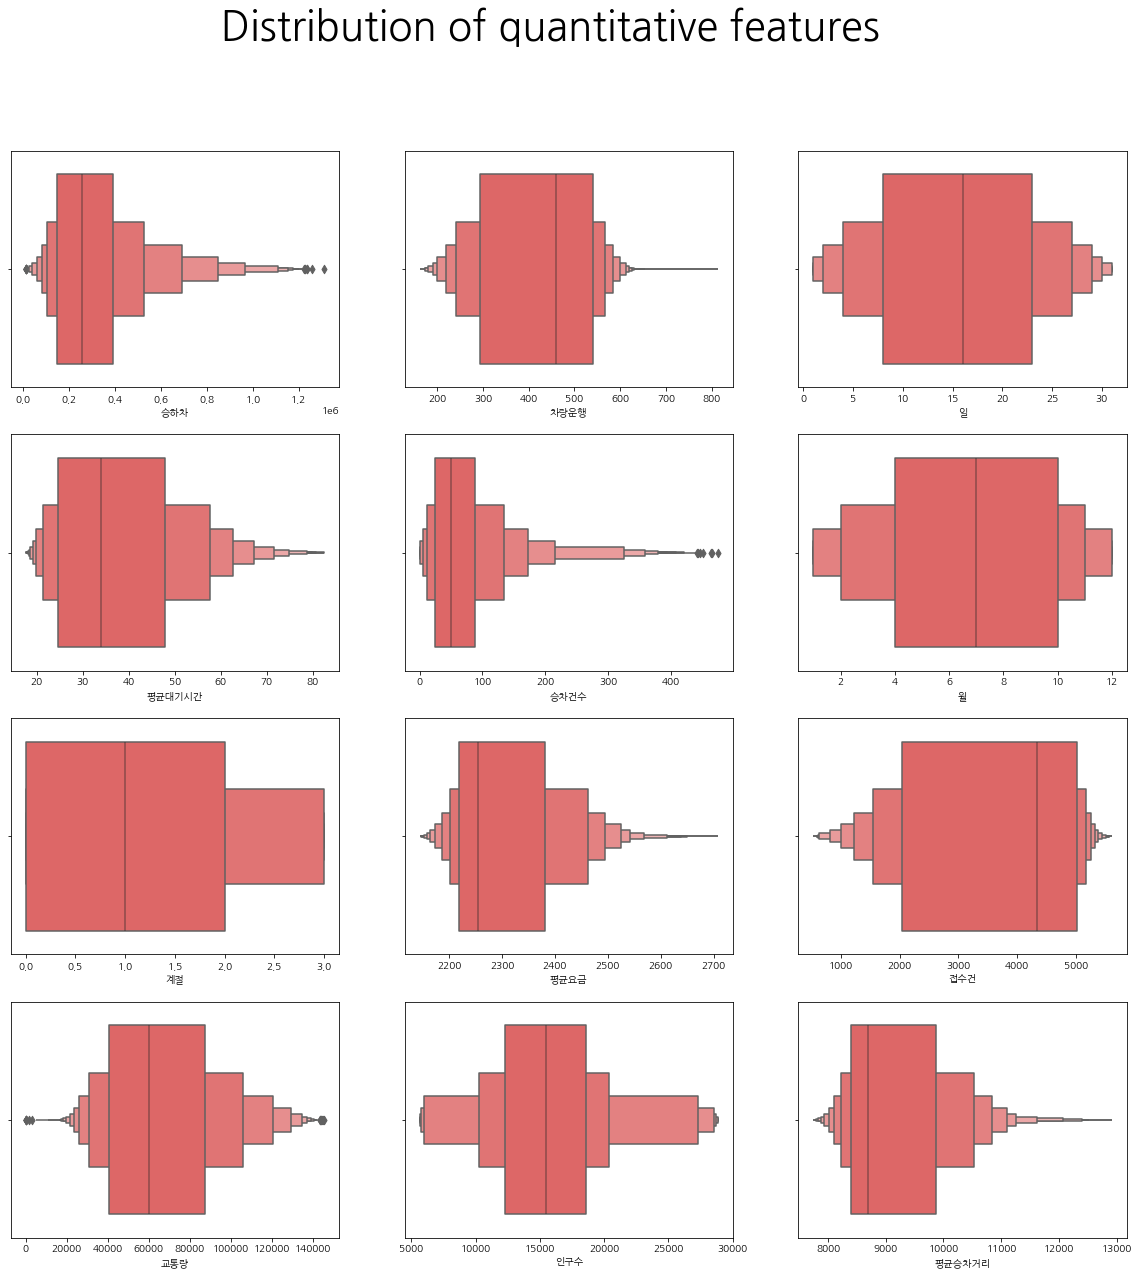

In [ ]:

fig, axes = plt.subplots(4, 3, figsize=(20,20))
fig.suptitle('Distribution of quantitative features', fontsize=40)
#plt.tight_layout()



for ax,feature in zip(axes.flatten(),quantitative):
    sns.boxenplot(data = df_train, x = feature, ax=ax, color='#f15354')
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/seaborn/utils.py:95: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



Text(0.5, 1.0, 'Correlation between features')

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



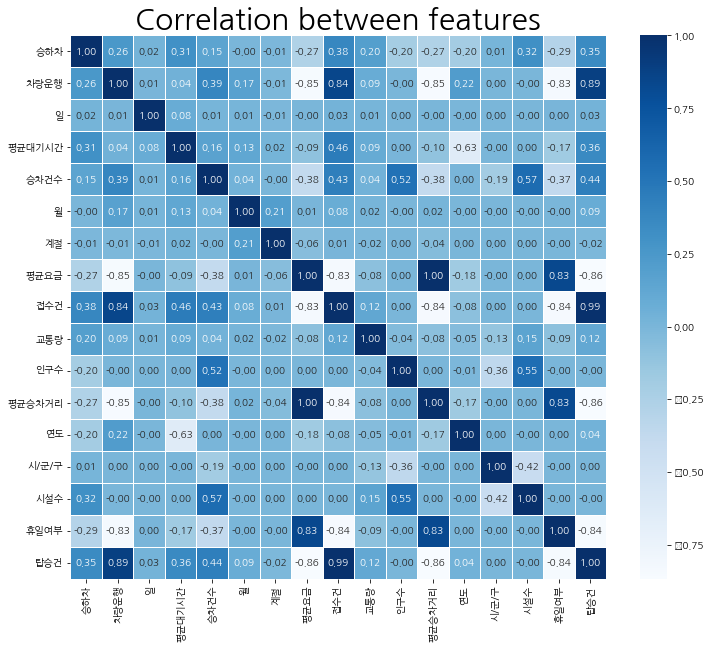

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# 수치형 데이터 상관관계 히트맵 시각화
train_corr = df_train[quantitative]
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

In [ ]:
# Target과 피쳐들의 상관관계
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['승차건수'].sort_values(ascending=False), columns=['승차건수'])
df_temp28.style.background_gradient(cmap='viridis')

,승차건수
승차건수,1.000000
시설수,0.565630
인구수,0.524075
탑승건,0.437373
접수건,0.433878
차량운행,0.387622
평균대기시간,0.164383
승하차,0.149032
교통량,0.036500
월,0.036323


# Column Drop

train set: 2019년 ~ 2021년 5월까지

test set: 2021년 6월 ~ 2021년 12월까지

In [ ]:
df_train.head()

,일자,시/군/구,연도,시설수,인구수,교통량,승하차,승차건수,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
0,2019-01-01,강남구,2019,17,15439,74968.0,306117,37,201,1406,1046,32.8,2416,10404,0
1,2019-01-01,중랑구,2019,3,20361,54931.0,79145,44,201,1406,1046,32.8,2416,10404,0
2,2019-01-01,중구,2019,8,5712,23632.0,409406,8,201,1406,1046,32.8,2416,10404,0
3,2019-01-01,종로구,2019,4,6068,24259.0,330176,21,201,1406,1046,32.8,2416,10404,0
4,2019-01-01,은평구,2019,10,21617,31820.0,164332,23,201,1406,1046,32.8,2416,10404,0


In [ ]:
X_train=df_train[['시설수','인구수','교통량','승하차','차량운행']]
c_train=df_train['휴일여부']
y_train=df_train['승차건수']

In [ ]:
X_train

,시설수,인구수,교통량,승하차,차량운행
0,17,15439,74968.0,306117,201
1,3,20361,54931.0,79145,201
2,8,5712,23632.0,409406,201
3,4,6068,24259.0,330176,201
4,10,21617,31820.0,164332,201
...,...,...,...,...,...
27395,13,18614,114501.0,262015,465
27396,17,15182,82876.0,764300,465
27397,8,5634,29271.0,623220,465
27398,9,14417,127379.0,338218,465


In [ ]:
X_train_r = df_train[['시설수','인구수','교통량','승하차','차량운행','휴일여부','승차건수']]

In [ ]:
X_train_r.head()

,시설수,인구수,교통량,승하차,차량운행,휴일여부,승차건수
0,17,15439,74968.0,306117,201,0,37
1,3,20361,54931.0,79145,201,0,44
2,8,5712,23632.0,409406,201,0,8
3,4,6068,24259.0,330176,201,0,21
4,10,21617,31820.0,164332,201,0,23


In [ ]:
X_test=df_test[['시설수','인구수','교통량','승하차','차량운행']]
c_test=df_test['휴일여부']

In [ ]:
X_test.head()

,시설수,인구수,교통량,승하차,차량운행
0,17.0,15182.0,123400.0,227057.0,297.0
1,13.0,18614.0,82512.0,114019.0,297.0
2,8.0,17395.0,87392.7,65767.0,297.0
3,17.0,28546.0,136910.0,105170.0,297.0
4,9.0,20211.0,63307.0,140191.0,297.0


In [ ]:
X_test2=df_test2[['시설수','인구수','교통량','승하차','차량운행']]
c_test2=df_test2['휴일여부']
y_test2=df_test2['승차건수']

# Modeling Trial

In [ ]:
#!pip install catboost

     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
#!pip install xgboost

In [ ]:
#!pip install pycaret[full]

     |████████████████████████████████| 320 kB 12.6 MB/s 
     |████████████████████████████████| 167 kB 37.6 MB/s 
     |████████████████████████████████| 2.0 MB 40.7 MB/s 
     |████████████████████████████████| 1.7 MB 41.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 6.8 MB 56.6 MB/s 
     |████████████████████████████████| 1.3 MB 68.5 MB/s 
     |████████████████████████████████| 120 kB 58.0 MB/s 
     |████████████████████████████████| 17.8 MB 504 kB/s 
     |████████████████████████████████| 262 kB 70.3 MB/s 
     |████████████████████████████████| 88 kB 6.4 MB/s 
     |████████████████████████████████| 92 kB 120 kB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 305 kB 65.2 MB/s 
     |█████████████████████

In [ ]:
#!apt-get -qq install -y Jinja2 

E: Unable to locate package Jinja2


In [ ]:
#pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import jinja2

In [ ]:
from pycaret.regression import *
reg = setup(df_train, target = '승차건수', train_size=0.8)

,Description,Value
0,session_id,5188
1,Target,승차건수
2,Original Data,"(27400, 7)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(21920, 15)"


## Trial 1. Voting

In [ ]:
top = compare_models(sort='RMSE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,11.1928,225.3911,15.0104,0.9457,0.5780,0.2750,6.454
lightgbm,Light Gradient Boosting Machine,11.4263,233.2268,15.2696,0.9438,0.5867,0.2851,0.192
xgboost,Extreme Gradient Boosting,11.3681,233.6100,15.2817,0.9437,0.5787,0.2768,2.468
rf,Random Forest Regressor,11.4671,239.2277,15.4634,0.9424,0.5780,0.2765,7.330
et,Extra Trees Regressor,11.5743,244.4350,15.6307,0.9412,0.5820,0.2773,4.028
gbr,Gradient Boosting Regressor,13.8216,339.3709,18.4189,0.9183,0.6803,0.3452,2.223
dt,Decision Tree Regressor,15.0721,421.0755,20.5169,0.8987,0.7357,0.3634,0.191
knn,K Neighbors Regressor,17.1197,685.8857,26.1860,0.8350,0.7018,0.4331,0.117
ada,AdaBoost Regressor,27.7657,1091.2653,33.0095,0.7369,1.0513,0.9396,1.189
br,Bayesian Ridge,27.5299,1311.6367,36.2052,0.6849,0.9410,0.7371,0.039


In [ ]:
blender_top = blend_models(estimator_list=top, optimize='RMSE') #voting regressor로 블렌딩합니다.

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.3157,237.1066,15.3983,0.9512,0.5900,0.2633
1,10.9183,217.1091,14.7346,0.9435,0.5687,0.2564
2,11.0831,223.4975,14.9498,0.9450,0.5943,0.2683
3,11.0255,210.9251,14.5233,0.9526,0.5699,0.2634
4,10.7106,216.2637,14.7059,0.9448,0.5491,0.2581
5,11.3932,231.2907,15.2082,0.9433,0.5919,0.2812
6,11.0326,221.5804,14.8856,0.9389,0.5726,0.2842
7,10.9119,213.0337,14.5957,0.9501,0.5589,0.2642
8,11.1257,216.7947,14.7240,0.9465,0.5831,0.2785


In [ ]:
final_model = finalize_model(blender_top)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
test.head()

,시설수,인구수,교통량,승하차,차량운행,휴일여부
0,17,15182,123400.0,227057,297,1
1,13,18614,82512.0,114019,297,1
2,8,17395,87392.7,65767,297,1
3,17,28546,136910.0,105170,297,1
4,9,20211,63307.0,140191,297,1


In [ ]:
test.head()

,시설수,인구수,교통량,승하차,차량운행,휴일여부
0,17,15182,123400.0,227057,297,1
1,13,18614,82512.0,114019,297,1
2,8,17395,87392.7,65767,297,1
3,17,28546,136910.0,105170,297,1
4,9,20211,63307.0,140191,297,1


In [ ]:
prediction = predict_model(final_model, data=test)

In [ ]:
prediction

,시설수,인구수,교통량,승하차,차량운행,휴일여부,Label
0,17,15182,123400.0,227057,297,1,27.402583
1,13,18614,82512.0,114019,297,1,21.032621
2,8,17395,87392.7,65767,297,1,30.522031
3,17,28546,136910.0,105170,297,1,80.585398
4,9,20211,63307.0,140191,297,1,15.981965
...,...,...,...,...,...,...,...
2245,6,7686,235080.0,172765,558,0,10.422116
2246,10,21756,48955.0,302792,558,0,157.403413
2247,4,5929,65631.0,516732,558,0,73.457767
2248,8,5634,60765.0,630907,558,0,8.824688


In [ ]:
pred = prediction['Label']

In [ ]:
pred = pred.astype(int)

In [ ]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_result, pred)
r2 = r2_score(test_result, pred)
rmse = np.sqrt(mse)
mape = MAPE(test_result, pred)
print('Mean squared error: ', mse)
print('R2 score: ', r2)
print('RMSE: ', rmse)
print('MAPE: ', mape)

Mean squared error:  469.63733333333334
R2 score:  0.9103780438435987
RMSE:  21.671117491567742
MAPE:  inf


zeor인 값이 있어서 mape inf나와서 rmse로 해야할듯

## Trial 2. Stacking

In [ ]:
 stack_top = stack_models(estimator_list=top, optimize='RMSE') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.3163,236.1558,15.3674,0.9514,0.5889,0.2643
1,10.8861,215.4675,14.6788,0.9439,0.5640,0.2562
2,11.0388,221.6255,14.8871,0.9455,0.5904,0.2675
3,11.0275,212.2232,14.5679,0.9523,0.5694,0.2639
4,10.6856,214.8295,14.6571,0.9452,0.5469,0.2577
5,11.3558,230.3172,15.1762,0.9435,0.5894,0.2809
6,11.0032,220.8985,14.8627,0.9391,0.5727,0.2844
7,10.9511,214.5324,14.6469,0.9498,0.5596,0.2643
8,11.0996,216.2876,14.7067,0.9466,0.5818,0.2778


In [ ]:
final_model1 = finalize_model(stack_top)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


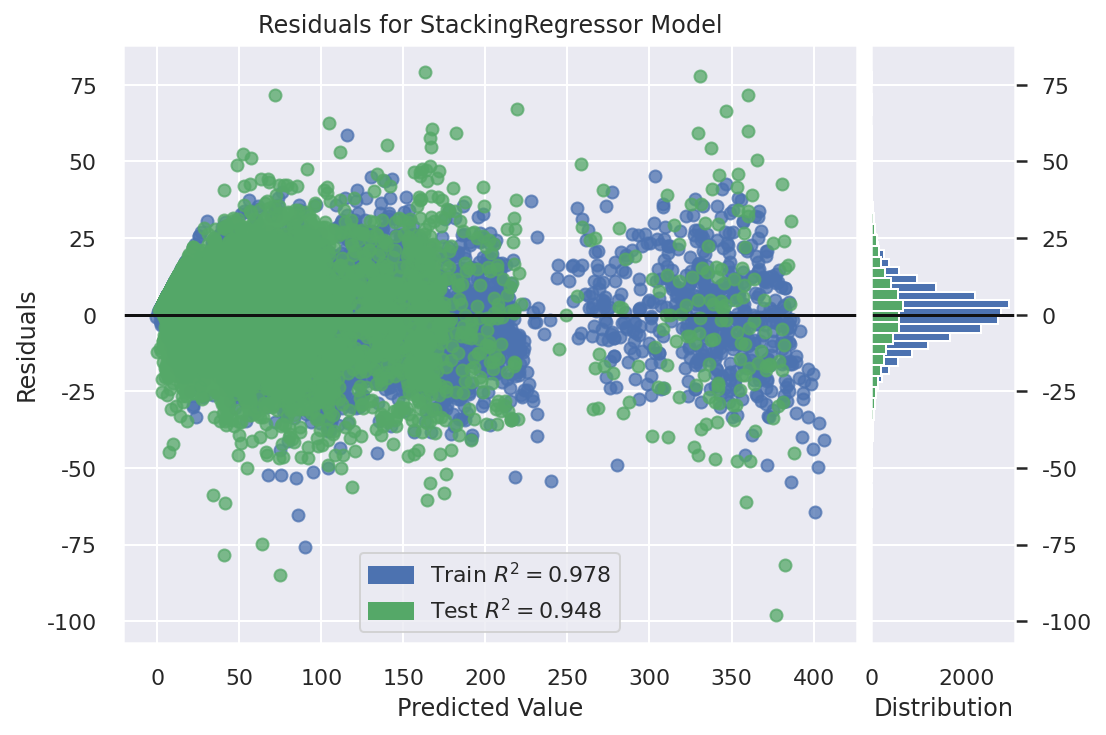

In [ ]:
# 모델 시각화(plot)_plot = 'residuals'

plot_model(stack_top)

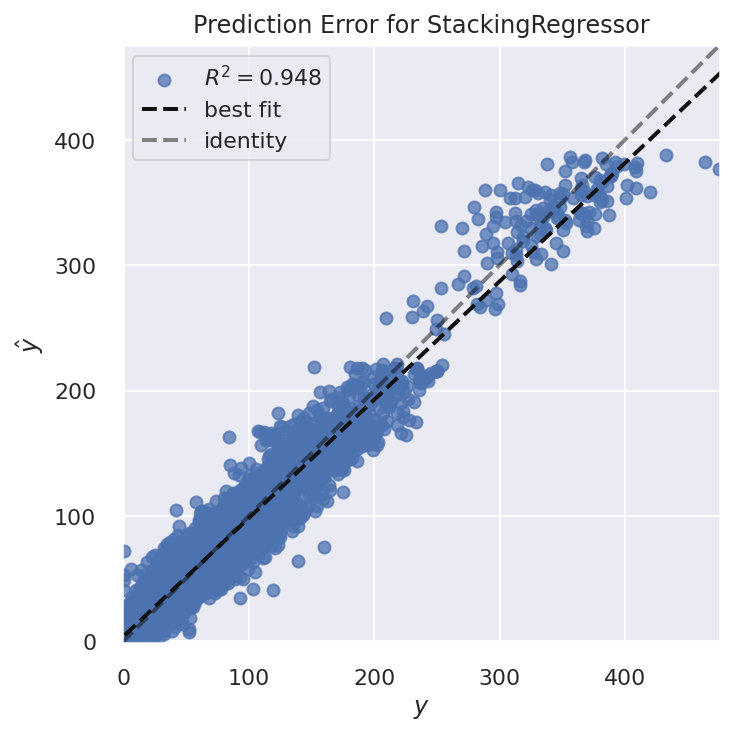

In [ ]:
# 모델 시각화(plot)_plot = 'error'

plot_model(stack_top, plot='error')


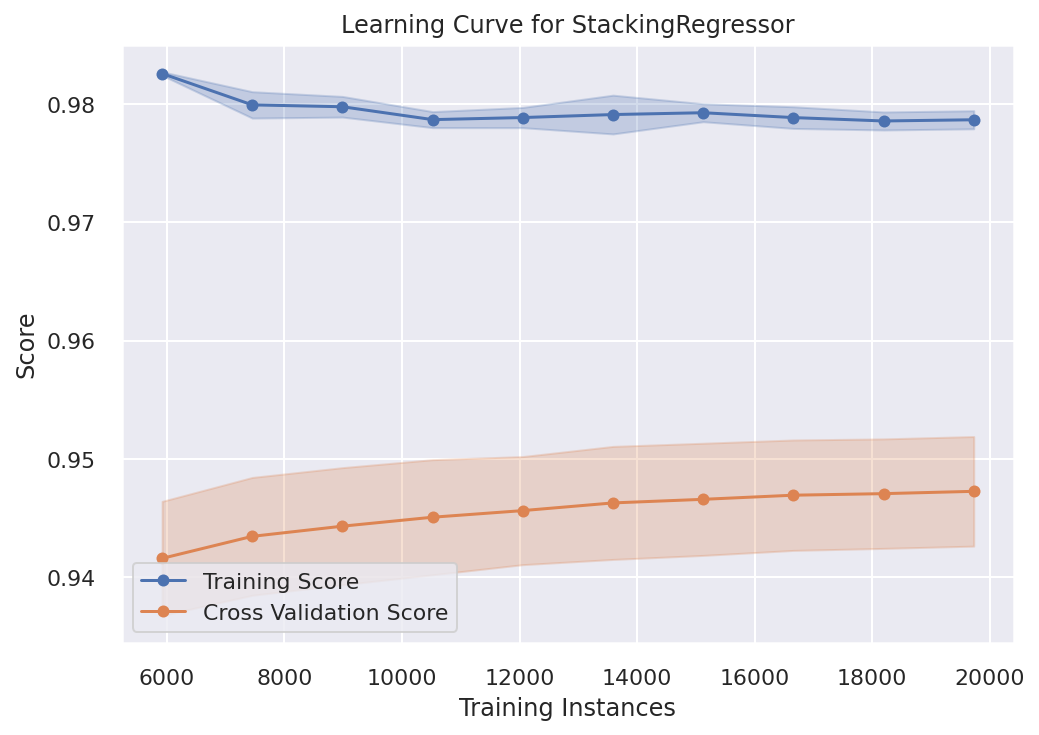

In [ ]:
# 모델 시각화(plot)_plot = 'learning'

plot_model(stack_top, plot='learning')


In [ ]:
test.head()

,시설수,인구수,교통량,승하차,차량운행,휴일여부
0,17,15182,123400.0,227057,297,1
1,13,18614,82512.0,114019,297,1
2,8,17395,87392.7,65767,297,1
3,17,28546,136910.0,105170,297,1
4,9,20211,63307.0,140191,297,1


In [ ]:
test.head()

,시설수,인구수,교통량,승하차,차량운행,휴일여부
0,17,15182,123400.0,227057,297,1
1,13,18614,82512.0,114019,297,1
2,8,17395,87392.7,65767,297,1
3,17,28546,136910.0,105170,297,1
4,9,20211,63307.0,140191,297,1


In [ ]:
prediction1 = predict_model(final_model1, data=test)

In [ ]:
prediction1

,시설수,인구수,교통량,승하차,차량운행,휴일여부,Label
0,17,15182,123400.0,227057,297,1,26.642892
1,13,18614,82512.0,114019,297,1,21.895170
2,8,17395,87392.7,65767,297,1,33.474308
3,17,28546,136910.0,105170,297,1,80.545559
4,9,20211,63307.0,140191,297,1,19.382448
...,...,...,...,...,...,...,...
2245,6,7686,235080.0,172765,558,0,10.853712
2246,10,21756,48955.0,302792,558,0,157.135481
2247,4,5929,65631.0,516732,558,0,72.510246
2248,8,5634,60765.0,630907,558,0,12.595910


In [ ]:
pred1 = prediction1['Label']

In [ ]:
pred1 = pred1.astype(int)

In [ ]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_result, pred1)
r2 = r2_score(test_result, pred1)
rmse = np.sqrt(mse)
mape = MAPE(test_result, pred1)
print('Mean squared error: ', mse)
print('R2 score: ', r2)
print('RMSE: ', rmse)
print('MAPE: ', mape)

Mean squared error:  328.8426666666667
R2 score:  0.9372462090158489
RMSE:  18.13401959485725
MAPE:  inf


스태킹이 보팅보다 성능이 좋음을 확인하였다.

# Final

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
train_data_scaled = scaler.transform(X_train)
test_data_scaled = scaler.transform(X_test)
test_data_scaled2 = scaler.transform(X_test2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.



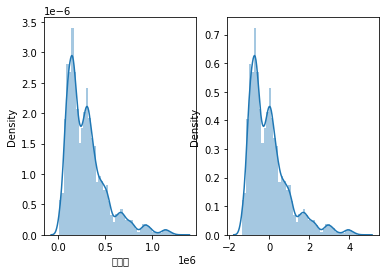

In [ ]:
fig, ax = plt.subplots(ncols=2)
sns.distplot(X_train.iloc[:,3], ax=ax[0])
sns.distplot(train_data_scaled[:,3], ax=ax[1])

In [ ]:
X_train_std = pd.DataFrame(train_data_scaled, columns = X_train.columns, index = X_train.index)
X_test_std = pd.DataFrame(test_data_scaled, columns = X_test.columns, index = X_test.index)
X_test_std2 = pd.DataFrame(test_data_scaled2, columns = X_test2.columns, index = X_test2.index)

In [ ]:
X_train_std

,시설수,인구수,교통량,승하차,차량운행
0,1.416020,-0.055646,0.315053,0.013074,-1.728746
1,-1.178781,0.828536,-0.345216,-1.054329,-1.728746
2,-0.252066,-1.802991,-1.376595,0.498821,-1.728746
3,-0.993438,-1.739040,-1.355934,0.126218,-1.728746
4,0.118619,1.054162,-1.106780,-0.653712,-1.728746
...,...,...,...,...,...
27395,0.674648,0.514707,1.617762,-0.194329,0.282279
27396,1.416020,-0.101813,0.575641,2.167814,0.282279
27397,-0.252066,-1.817003,-1.190776,1.504344,0.282279
27398,-0.066723,-0.239236,2.042124,0.164038,0.282279


In [ ]:
X_test_std

,시설수,인구수,교통량,승하차,차량운행
0,1.416020,-0.101813,1.911006,-0.358729,-0.997464
1,0.674648,0.514707,0.563646,-0.890324,-0.997464
2,-0.252066,0.295728,0.724477,-1.117243,-0.997464
3,1.416020,2.298879,2.356194,-0.931939,-0.997464
4,-0.066723,0.801590,-0.069206,-0.767242,-0.997464
...,...,...,...,...,...
4520,-0.622752,-1.448384,6.301824,-0.690201,0.737458
4521,0.118619,1.079132,-0.960649,-0.085986,0.737458
4522,-0.993438,-1.764009,0.009009,0.817037,0.737458
4523,-0.252066,-1.817003,-0.149998,1.274892,0.737458


In [ ]:
X_test_std2

,시설수,인구수,교통량,승하차,차량운행
0,1.416020,-0.101813,1.911006,-0.358729,-0.997464
1,0.674648,0.514707,0.563646,-0.890324,-0.997464
2,-0.252066,0.295728,0.724477,-1.117243,-0.997464
3,1.416020,2.298879,2.356194,-0.931939,-0.997464
4,-0.066723,0.801590,-0.069206,-0.767242,-0.997464
...,...,...,...,...,...
2245,-0.622752,-1.448384,5.591137,-0.614053,0.990708
2246,0.118619,1.079132,-0.542140,-0.002563,0.990708
2247,-0.993438,-1.764009,0.007375,1.003553,0.990708
2248,-0.252066,-1.817003,-0.152971,1.540495,0.990708


In [ ]:
r = pd.concat([X_train_std,c_train],axis=1)

In [ ]:
X_train_f = pd.concat([r,y_train],axis=1)

In [ ]:
X_test_f = pd.concat([X_test_std,c_test],axis=1)

In [ ]:
X_train_f

,시설수,인구수,교통량,승하차,차량운행,휴일여부,승차건수
0,1.416020,-0.055646,0.315053,0.013074,-1.728746,0,37
1,-1.178781,0.828536,-0.345216,-1.054329,-1.728746,0,44
2,-0.252066,-1.802991,-1.376595,0.498821,-1.728746,0,8
3,-0.993438,-1.739040,-1.355934,0.126218,-1.728746,0,21
4,0.118619,1.054162,-1.106780,-0.653712,-1.728746,0,23
...,...,...,...,...,...,...,...
27395,0.674648,0.514707,1.617762,-0.194329,0.282279,0,113
27396,1.416020,-0.101813,0.575641,2.167814,0.282279,0,38
27397,-0.252066,-1.817003,-1.190776,1.504344,0.282279,0,16
27398,-0.066723,-0.239236,2.042124,0.164038,0.282279,0,36


In [ ]:
X_test_f

,시설수,인구수,교통량,승하차,차량운행,휴일여부
0,1.416020,-0.101813,1.911006,-0.358729,-0.997464,1
1,0.674648,0.514707,0.563646,-0.890324,-0.997464,1
2,-0.252066,0.295728,0.724477,-1.117243,-0.997464,1
3,1.416020,2.298879,2.356194,-0.931939,-0.997464,1
4,-0.066723,0.801590,-0.069206,-0.767242,-0.997464,1
...,...,...,...,...,...,...
4520,-0.622752,-1.448384,6.301824,-0.690201,0.737458,0
4521,0.118619,1.079132,-0.960649,-0.085986,0.737458,0
4522,-0.993438,-1.764009,0.009009,0.817037,0.737458,0
4523,-0.252066,-1.817003,-0.149998,1.274892,0.737458,0


In [ ]:
r2 = pd.concat([X_test_std2,c_test2],axis=1)

In [ ]:
X_test_f2 = pd.concat([r2,y_test2],axis=1)

In [ ]:
X_test_f2

,시설수,인구수,교통량,승하차,차량운행,휴일여부,승차건수
0,1.416020,-0.101813,1.911006,-0.358729,-0.997464,1,38.0
1,0.674648,0.514707,0.563646,-0.890324,-0.997464,1,30.0
2,-0.252066,0.295728,0.724477,-1.117243,-0.997464,1,14.0
3,1.416020,2.298879,2.356194,-0.931939,-0.997464,1,92.0
4,-0.066723,0.801590,-0.069206,-0.767242,-0.997464,1,13.0
...,...,...,...,...,...,...,...
2245,-0.622752,-1.448384,5.591137,-0.614053,0.990708,0,0.0
2246,0.118619,1.079132,-0.542140,-0.002563,0.990708,0,144.0
2247,-0.993438,-1.764009,0.007375,1.003553,0.990708,0,112.0
2248,-0.252066,-1.817003,-0.152971,1.540495,0.990708,0,19.0


## Modeling


In [ ]:
#!pip install catboost

     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
#!pip install xgboost

In [ ]:
!pip install pycaret[full]

     |████████████████████████████████| 320 kB 5.4 MB/s 
     |████████████████████████████████| 262 kB 42.6 MB/s 
     |████████████████████████████████| 6.8 MB 59.7 MB/s 
     |████████████████████████████████| 167 kB 56.3 MB/s 
     |████████████████████████████████| 17.8 MB 468 kB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 1.3 MB 44.0 MB/s 
     |████████████████████████████████| 1.7 MB 63.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 38.0 MB/s 
     |████████████████████████████████| 120 kB 41.7 MB/s 
     |████████████████████████████████| 88 kB 6.2 MB/s 
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 305 kB 52.1 MB/s 
     |████████████████████████████████| 192.9 MB 73 kB/s 
     |██████████████████

In [ ]:
#!apt-get -qq install -y Jinja2 

E: Unable to locate package Jinja2


In [ ]:
pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import jinja2

In [ ]:
from pycaret.regression import *

reg = setup(X_train_f, target = '승차건수', train_size=0.8)

,Description,Value
0,session_id,5561
1,Target,승차건수
2,Original Data,"(27400, 7)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(21920, 6)"


In [ ]:
top = compare_models(sort='RMSE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,11.3485,231.3407,15.2063,0.9454,0.5823,0.2782,5.572
lightgbm,Light Gradient Boosting Machine,11.5640,239.5413,15.4709,0.9435,0.5903,0.2872,0.251
xgboost,Extreme Gradient Boosting,11.5666,242.2180,15.5582,0.9429,0.5851,0.2824,1.793
rf,Random Forest Regressor,11.5538,244.5017,15.6327,0.9423,0.5780,0.2774,6.162
et,Extra Trees Regressor,11.6420,247.8899,15.7404,0.9415,0.5807,0.2806,3.409
knn,K Neighbors Regressor,12.1201,273.9971,16.5514,0.9352,0.5907,0.2902,0.080
gbr,Gradient Boosting Regressor,14.5489,376.0182,19.3860,0.9113,0.6913,0.3737,1.873
dt,Decision Tree Regressor,15.2886,439.1316,20.9494,0.8965,0.7324,0.3677,0.115
ada,AdaBoost Regressor,27.4733,1066.7949,32.6511,0.7476,1.0283,0.9324,0.877
br,Bayesian Ridge,33.1439,1936.8285,44.0035,0.5432,1.0382,0.8330,0.020


In [ ]:
cat = create_model('catboost', cross_validation = False)
lgbm = create_model('lightgbm', cross_validation = False)
xgb = create_model('xgboost', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,11.3472,238.2412,15.4351,0.9456,0.5765,0.2859


In [ ]:
tuned_cat = tune_model(cat, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.3908,268.3699,16.3820,0.9399,0.6263,0.2984
1,12.3424,272.3324,16.5025,0.9371,0.6460,0.3007
2,12.7272,288.5207,16.9859,0.9299,0.6183,0.3125
3,11.7859,239.3674,15.4715,0.9408,0.5946,0.3034
4,11.9997,254.0628,15.9393,0.9364,0.5946,0.3016
5,11.7982,253.9631,15.9362,0.9404,0.6040,0.2873
6,11.8721,252.8386,15.9009,0.9329,0.6023,0.3062
7,12.1551,259.9518,16.1230,0.9410,0.6245,0.3077
8,11.9276,258.2863,16.0713,0.9424,0.5362,0.2862


In [ ]:
tuned_lgbm = tune_model(lgbm, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.3777,268.1701,16.3759,0.9400,0.6247,0.3014
1,12.2519,273.2041,16.5289,0.9369,0.6452,0.2930
2,12.5256,282.4922,16.8075,0.9314,0.6206,0.3066
3,11.9981,251.8122,15.8686,0.9378,0.5970,0.3201
4,11.9200,251.9916,15.8742,0.9369,0.5933,0.2968
5,11.8374,259.9980,16.1245,0.9390,0.6092,0.2866
6,11.9572,254.3047,15.9469,0.9325,0.6096,0.3110
7,12.0019,253.7222,15.9287,0.9424,0.6153,0.3075
8,11.8247,250.7992,15.8366,0.9440,0.5582,0.2894


In [ ]:
tuned_xgb = tune_model(xgb, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.6614,246.3762,15.6964,0.9449,0.6153,0.2712
1,11.4394,242.3036,15.5661,0.9440,0.6092,0.2675
2,11.8567,261.8242,16.1810,0.9364,0.5847,0.2742
3,11.2974,221.9659,14.8985,0.9451,0.5652,0.2874
4,11.4423,237.0065,15.3950,0.9406,0.5702,0.2759
5,11.0768,232.7758,15.2570,0.9454,0.5780,0.2656
6,11.3101,230.7479,15.1904,0.9388,0.5638,0.2805
7,11.4431,239.3941,15.4724,0.9457,0.5793,0.2791
8,11.2139,230.0105,15.1661,0.9487,0.5289,0.2637


In [ ]:
stack_top = stack_models(estimator_list=[tuned_cat,tuned_lgbm,tuned_xgb], optimize='RMSE') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.6132,241.2397,15.5319,0.9460,0.6088,0.2723
1,11.4713,240.2838,15.5011,0.9445,0.6100,0.2710
2,11.8479,257.0855,16.0339,0.9376,0.5861,0.2792
3,11.2314,217.3804,14.7438,0.9463,0.5625,0.2888
4,11.2968,229.2261,15.1402,0.9426,0.5702,0.2751
5,11.0221,227.1642,15.0720,0.9467,0.5748,0.2642
6,11.2055,224.8026,14.9934,0.9403,0.5707,0.2820
7,11.3662,231.1685,15.2042,0.9475,0.5849,0.2827
8,11.1332,224.0557,14.9685,0.9500,0.5257,0.2642


In [ ]:
blender_top = blend_models(estimator_list=[tuned_cat,tuned_lgbm,tuned_xgb], optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.8107,245.7933,15.6778,0.9450,0.6144,0.2797
1,11.6744,246.6071,15.7037,0.9430,0.6226,0.2785
2,12.0384,261.8027,16.1803,0.9364,0.5950,0.2886
3,11.3822,222.0908,14.9027,0.9451,0.5742,0.2940
4,11.4051,232.3828,15.2441,0.9418,0.5818,0.2807
5,11.2081,232.3039,15.2415,0.9455,0.5845,0.2691
6,11.3199,229.5399,15.1506,0.9391,0.5877,0.2885
7,11.5284,234.9173,15.3270,0.9467,0.6020,0.2899
8,11.3076,230.6413,15.1869,0.9485,0.5327,0.2696


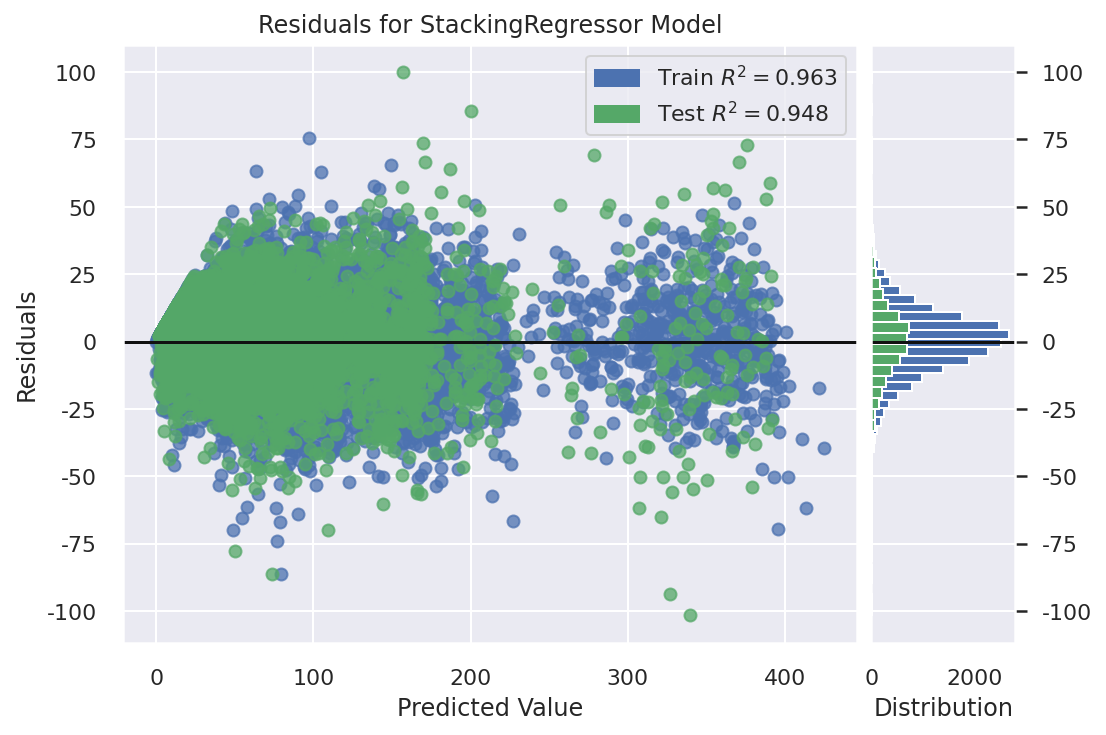

In [ ]:
# 모델 시각화(plot)_plot = 'residuals'

plot_model(stack_top)

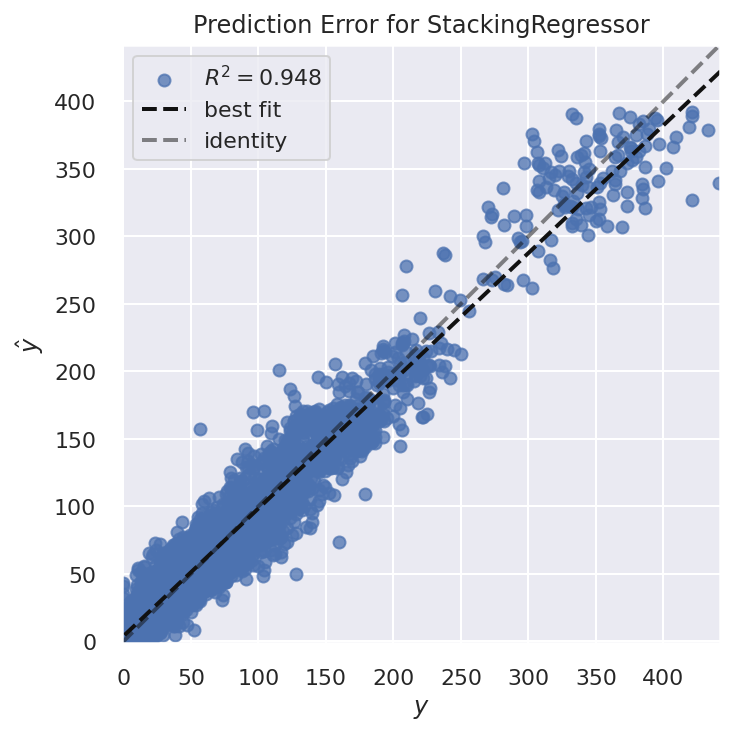

In [ ]:
# 모델 시각화(plot)_plot = 'error'

plot_model(stack_top, plot='error')

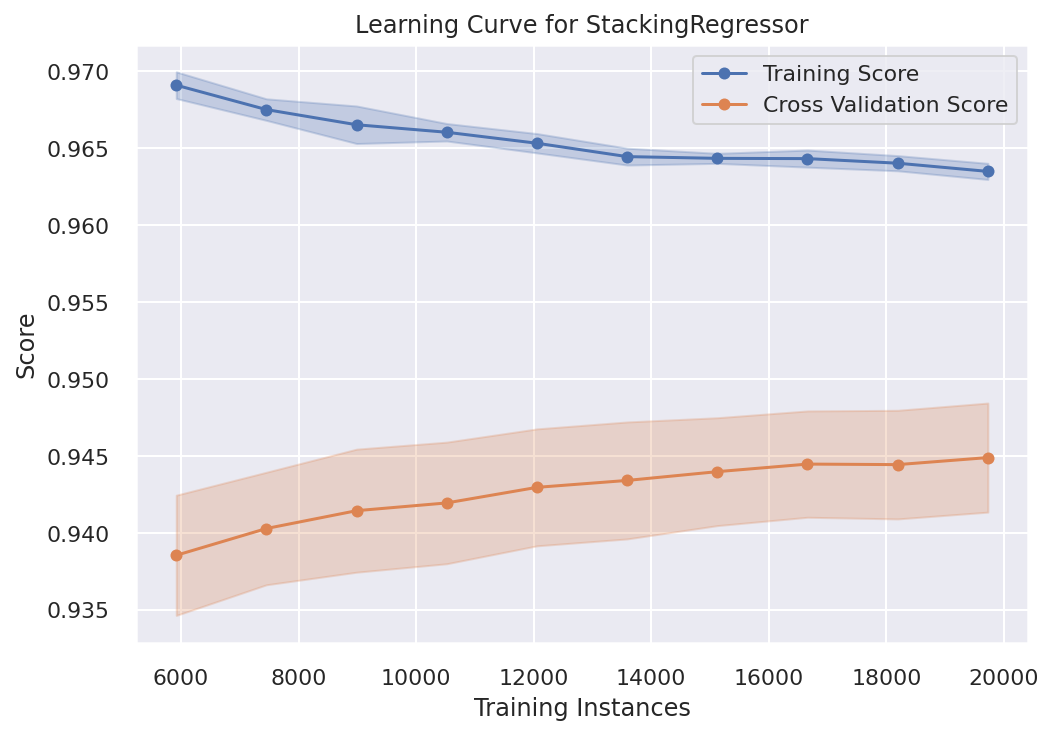

In [ ]:
# 모델 시각화(plot)_plot = 'learning'

plot_model(stack_top, plot='learning')


In [ ]:
final_model = finalize_model(stack_top)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 

In [ ]:
final_model2 = finalize_model(blender_top)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 

In [ ]:
prediction = predict_model(final_model, data=X_test_f)

In [ ]:
prediction2 = predict_model(final_model, data=X_test_f2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,14.7281,381.5266,19.5327,0.9272,0.6791,0.3525


In [ ]:
predict_blend = predict_model(final_model2, data=X_test_f2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,15.0269,399.5932,19.9898,0.9237,0.68,0.3537


In [ ]:
prediction

,시설수,인구수,교통량,승하차,차량운행,휴일여부,Label
0,1.416020,-0.101813,1.911006,-0.358729,-0.997464,1,30.219798
1,0.674648,0.514707,0.563646,-0.890324,-0.997464,1,21.336972
2,-0.252066,0.295728,0.724477,-1.117243,-0.997464,1,21.626114
3,1.416020,2.298879,2.356194,-0.931939,-0.997464,1,83.919800
4,-0.066723,0.801590,-0.069206,-0.767242,-0.997464,1,16.622601
...,...,...,...,...,...,...,...
4520,-0.622752,-1.448384,6.301824,-0.690201,0.737458,0,7.418626
4521,0.118619,1.079132,-0.960649,-0.085986,0.737458,0,154.140509
4522,-0.993438,-1.764009,0.009009,0.817037,0.737458,0,57.480882
4523,-0.252066,-1.817003,-0.149998,1.274892,0.737458,0,10.724717


In [ ]:
pred = prediction['Label']

In [ ]:
pred = pred.astype(int)

## Result

In [ ]:
prediction['예측승차건수'] = pred

In [ ]:
prediction.drop(columns = ['Label'],axis=1,inplace=True)

In [ ]:
prediction.head()

,시설수,인구수,교통량,승하차,차량운행,휴일여부,예측승차건수
0,1.416020,-0.101813,1.911006,-0.358729,-0.997464,1,30
1,0.674648,0.514707,0.563646,-0.890324,-0.997464,1,21
2,-0.252066,0.295728,0.724477,-1.117243,-0.997464,1,21
3,1.416020,2.298879,2.356194,-0.931939,-0.997464,1,83
4,-0.066723,0.801590,-0.069206,-0.767242,-0.997464,1,16


In [ ]:
t = df_test['시/군/구']
predictionf = pd.concat([prediction,t],axis=1)

In [ ]:
gugu = predictionf.groupby(['시/군/구']).agg({'예측승차건수':'mean'}).reset_index()

In [ ]:
gugu.sort_values(by=gugu.columns[1],ascending=False,inplace=True)

In [ ]:
gugu.shape

(25, 2)

In [ ]:
gugu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 8 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시/군/구   25 non-null     object 
 1   예측승차건수  25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 600.0+ bytes


In [ ]:
gugu.reset_index(drop=True, inplace=True)

In [ ]:
gugu['예측승차건수'] = gugu['예측승차건수'].astype(int)

In [ ]:
gugu

,시/군/구,예측승차건수
0,노원구,266
1,강서구,168
2,서대문구,117
3,은평구,114
4,강동구,107
5,마포구,106
6,강남구,88
7,송파구,77
8,중랑구,69
9,도봉구,61


## Visualization

In [ ]:
import folium

In [ ]:
import json

In [ ]:
seoul_map = folium.Map(location=[37.565784, 126.938572], zoom_start=11)

json_data=open("/content/drive/Shareddrives/[YBIGTA] DATA Analytics Team/주니어 교육세션/06.공간시각화(Folium)/과제/seoul_municipalities.json", encoding = 'euc-kr').read()
file = json.loads(json_data)

seoul_map.choropleth(geo_data=file, 
                     data=gugu, 
                     columns=['시/군/구', '예측승차건수'], 
                     key_on='properties.SIG_KOR_NM',  #key_on 파라미터가 자동으로 json 파일과 데이터 파일을 연결시켜 줍니다.
                     fill_color='YlGn') 

seoul_map

In [ ]:
plt.rc('font', family='NanumBarunGothic') # 폰트 설정
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
sns.set()

<AxesSubplot:xlabel='예측승차건수', ylabel='시/군/구'>

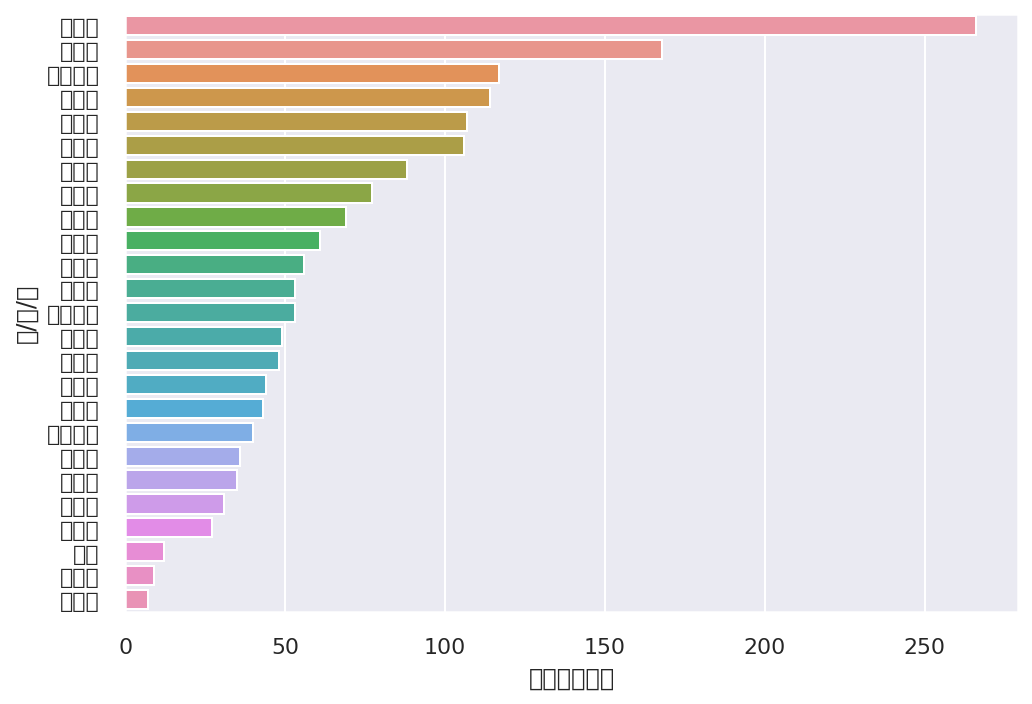

In [ ]:
sns.barplot(x = '예측승차건수', y = '시/군/구', data = gugu)

In [ ]:
gugu.to_csv('/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/데이터/승차건수예측결과.csv', index=False)